# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [59]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
weather_response = requests.get(query_url).json()
pprint(weather_response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 77.48, 'lon': -69.36},
 'dt': 1552860690,
 'id': 3831208,
 'main': {'grnd_level': 971.37,
          'humidity': 83,
          'pressure': 1006.65,
          'sea_level': 1006.65,
          'temp': -27.71,
          'temp_max': -27.71,
          'temp_min': -27.71},
 'name': 'Qaanaaq',
 'sys': {'country': 'GL',
         'message': 0.0032,
         'sunrise': 1552820127,
         'sunset': 1552862179},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 34.0002, 'speed': 8.66}}


In [61]:
weather_response['name']

#cities.index(city)
#print(city)

'Qaanaaq'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
url = "http://api.openweathermap.org/data/2.5/weather?"


city_name_list = []
temperature_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
max_temp_list = []
lat_list = []
lng_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities: 
    try:
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url).json()
        print(f"Processing Record {cities.index(city) + 1} of Set 1 | {city}")
        city_name = weather_response['name']
        temperature = weather_response['main']['temp']
        humidity = weather_response['main']['humidity']
        cloudiness = weather_response['clouds']['all']
        wind_speed = weather_response['wind']['speed']
        date = weather_response['dt']
        country = weather_response['sys']['country']
        max_temp = weather_response['main']['temp_max']
        lat = weather_response['coord']['lat']
        lng = weather_response['coord']['lon']
        city_name_list.append(city_name)
        temperature_list.append(temperature)
        humidity_list.append(humidity)
        cloudiness_list.append(cloudiness)
        wind_speed_list.append(wind_speed)
        date_list.append(date)
        country_list.append(country)
        max_temp_list.append(max_temp)
        lat_list.append(lat)
        lng_list.append(lng)
    except KeyError:
        print("City not found. Skipping...")




Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | rodrigues alves
Processing Record 3 of Set 1 | kamaishi
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | nizhnevartovsk
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | sept-iles
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | kizlyar
Processing Record 12 of Set 1 | plettenberg bay
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | kozulka
Processing Record 19 of Set 1 | gotsu
Processing Record 20 of Set 1 | huangnihe
Processing Record 21 of Set 1 | vao
Processing Re

Processing Record 182 of Set 1 | port hedland
Processing Record 183 of Set 1 | medicine hat
Processing Record 184 of Set 1 | acapulco
Processing Record 185 of Set 1 | afmadu
City not found. Skipping...
Processing Record 186 of Set 1 | voyvozh
Processing Record 187 of Set 1 | susanville
Processing Record 188 of Set 1 | kieta
Processing Record 189 of Set 1 | hambantota
Processing Record 190 of Set 1 | norman wells
Processing Record 191 of Set 1 | vila
Processing Record 192 of Set 1 | avera
Processing Record 193 of Set 1 | chokurdakh
Processing Record 194 of Set 1 | salinas
Processing Record 195 of Set 1 | butaritari
Processing Record 196 of Set 1 | bathsheba
Processing Record 197 of Set 1 | arandis
Processing Record 198 of Set 1 | krasnoselkup
City not found. Skipping...
Processing Record 199 of Set 1 | otradnoye
Processing Record 200 of Set 1 | lebu
Processing Record 201 of Set 1 | georgetown
Processing Record 202 of Set 1 | buala
Processing Record 203 of Set 1 | ishigaki
Processing Rec

Processing Record 366 of Set 1 | kamenka
Processing Record 367 of Set 1 | havre-saint-pierre
Processing Record 368 of Set 1 | puksoozero
Processing Record 369 of Set 1 | roebourne
Processing Record 370 of Set 1 | nizwa
Processing Record 371 of Set 1 | verkhnyaya inta
Processing Record 372 of Set 1 | nouadhibou
Processing Record 373 of Set 1 | severo-kurilsk
Processing Record 374 of Set 1 | sabang
Processing Record 375 of Set 1 | orocue
Processing Record 376 of Set 1 | labuan
Processing Record 377 of Set 1 | salima
Processing Record 378 of Set 1 | road town
Processing Record 379 of Set 1 | kapit
Processing Record 380 of Set 1 | srednekolymsk
Processing Record 381 of Set 1 | north bend
Processing Record 382 of Set 1 | grand centre
City not found. Skipping...
Processing Record 383 of Set 1 | dong xoai
Processing Record 384 of Set 1 | pozo colorado
Processing Record 385 of Set 1 | xadani
City not found. Skipping...
Processing Record 386 of Set 1 | kattivakkam
Processing Record 387 of Set 1

Processing Record 550 of Set 1 | sinop
Processing Record 551 of Set 1 | koumac
Processing Record 552 of Set 1 | furano
Processing Record 553 of Set 1 | kuzhithurai
Processing Record 554 of Set 1 | rosetta
Processing Record 555 of Set 1 | cazaje
City not found. Skipping...
Processing Record 556 of Set 1 | palestine
Processing Record 557 of Set 1 | henties bay
Processing Record 558 of Set 1 | haines junction
Processing Record 559 of Set 1 | barroualie
City not found. Skipping...
Processing Record 560 of Set 1 | south valley
Processing Record 561 of Set 1 | bitung
Processing Record 562 of Set 1 | winkler
Processing Record 563 of Set 1 | alyangula
Processing Record 564 of Set 1 | robertsport
Processing Record 565 of Set 1 | ngong
Processing Record 566 of Set 1 | wanlaweyn
Processing Record 567 of Set 1 | sangareddi
Processing Record 568 of Set 1 | san quintin
Processing Record 569 of Set 1 | verkhoyansk
Processing Record 570 of Set 1 | emerald
Processing Record 571 of Set 1 | sembe
City no

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
print(len(city_name_list))
print(len(cloudiness_list))
print(len(country_list))
print(len(date_list))
print(len(humidity_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(wind_speed_list))

551
551
551
551
551
551
551
551
551


In [78]:
weather_df = {
    "City": city_name_list,
    "Cloudiness": cloudiness_list,
    "Country": country_list,
    "Date": date_list,
    "Humidity": humidity,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Wind Speed": wind_speed_list
}
weather_df = pd.DataFrame(weather_df)
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [79]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,0,AU,1552860507,88,-23.58,149.07,66.26,4.74
1,Rodrigues Alves,40,BR,1552860000,88,-7.74,-72.65,84.20,2.24
2,Kamaishi,0,JP,1552860781,88,39.28,141.86,24.32,4.18
3,Whitehorse,90,CA,1552860175,88,60.72,-135.06,41.00,16.11
4,Nizhnevartovsk,0,RU,1552858200,88,60.93,76.58,1.40,4.47


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

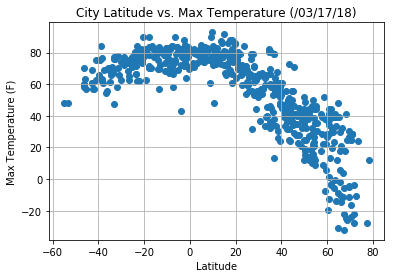

In [80]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (/03/17/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

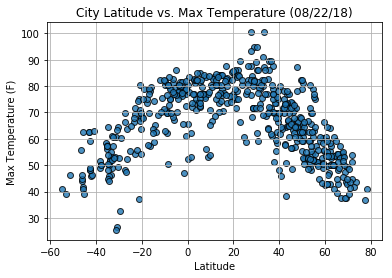

#### Latitude vs. Humidity Plot

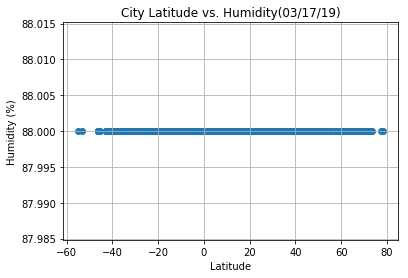

In [81]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(03/17/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

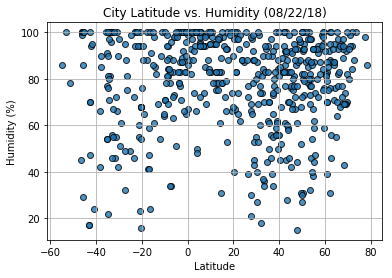

#### Latitude vs. Cloudiness Plot

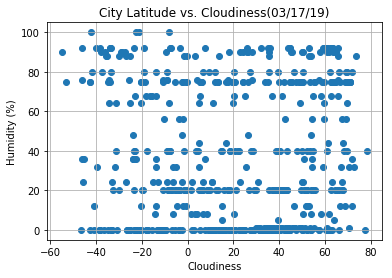

In [82]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(03/17/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

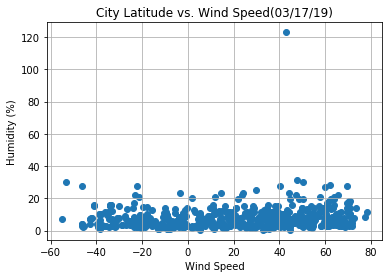

In [90]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(03/17/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind Speed.png")

# Show plot
plt.show()

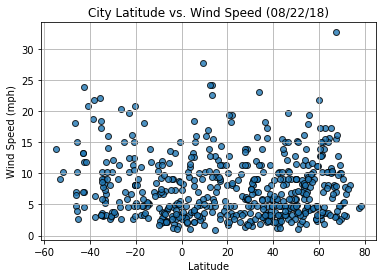